In [1]:
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header = None)
x = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [3]:
pipe_svc = Pipeline([('scl', StandardScaler()), ('clf', SVC(random_state = 1))])
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C' : param_range,
              'clf__kernel': ['linear']}, 
             {'clf__C': param_range, 
             'clf__gamma': param_range,
             'clf__kernel': ['rbf']}]

gs = GridSearchCV(estimator = pipe_svc, param_grid = param_grid, scoring = 'accuracy', cv = 10, n_jobs = -1)

gs = gs.fit(x_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.978021978021978
{'clf__C': 0.1, 'clf__kernel': 'linear'}


In [4]:
clf = gs.best_estimator_
clf.fit(x_train, y_train)
print(clf.score(x_test, y_test))

0.9649122807017544


In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
pipe_svc.fit(x_train, y_train)
y_pred = pipe_svc.predict(x_test)
confmat = confusion_matrix(y_true = y_test, y_pred = y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


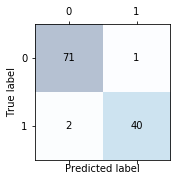

In [13]:
fig, ax = plt.subplots(figsize = (2.5, 2.5))
ax.matshow(confmat, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x = j, y = i, s = confmat[i,j], va = 'center', ha = 'center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [16]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

print('Precision is : ', precision_score(y_test, y_pred))
print('recall is : ', recall_score(y_test, y_pred))
print('F1 Score is : ', f1_score(y_test, y_pred))

Precision is :  0.975609756097561
recall is :  0.9523809523809523
F1 Score is :  0.963855421686747
